In [1]:
#to install the libraries and packages required 
#before this run, download pip in command line 
!pip install pandas
!pip install sklearn 
!pip install matplotlib
!pip install numpy
!pip install bioinfokit
!pip install combat
!pip install seaborn

## Preparation step for later use 

In [153]:
## Define the columns that are required for construction of dataframe in binary table 
pc = []
for i in range(1,25):
    pc.append("PC"+str(i))
    i += 1 

## Define function for obtaining sample values along components

In [78]:
#define the function for obtaining sample values along components 
def calcpc(matrix, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = matrix.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = matrix.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

## Data preparation

In [155]:
#Data preparation 
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from __future__ import division
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#transpose and convert first column as header, generate the feature tables
geneaggregate = pd.read_csv('RC_data.csv')
df = geneaggregate[sorted(geneaggregate.columns)]
dfT = df.swapaxes("index", "columns")
new_header = dfT.iloc[0] #grab the first row for the header
featuretable = dfT[1:] #take the data less the header row
featuretable.columns = new_header #set the header row as the df header

#store the protein expression values and protein gene names 
samples = featuretable.values
sample_names = featuretable.columns

In [142]:
#main aim of this block is to perform z-normalisation through patients: correct way
#apply z-normalisation on transposed featuretable 
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

#z normalise the non-batch corrected data
df_znormalised_bypatients = z_score(featuretable.T)
df_znormalised = df_znormalised_bypatients.T
df_znormalised

#z normalise the batch corrected data 
df_z_bc_bypatients = z_score(df_batchcorrected)
df_z_bc_bypatients

,cancer_cc_patient1_rep1,cancer_cc_patient1_rep2,cancer_cc_patient2_rep1,cancer_cc_patient2_rep2,cancer_cc_patient3_rep1,cancer_cc_patient3_rep2,cancer_cc_patient6_rep1,cancer_cc_patient6_rep2,cancer_cc_patient7_rep1,cancer_cc_patient7_rep2,...,normal_cc_patient2_rep1,normal_cc_patient2_rep2,normal_cc_patient3_rep1,normal_cc_patient3_rep2,normal_cc_patient6_rep1,normal_cc_patient6_rep2,normal_cc_patient7_rep1,normal_cc_patient7_rep2,normal_cc_patient8_rep1,normal_cc_patient8_rep2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Q9UBE0,-0.346859,-0.409382,-0.499211,-0.563704,-0.708811,-0.563079,-0.513503,-0.472609,-0.448889,-0.518835,...,-0.611118,-0.728522,-0.733132,-0.778336,-0.853773,-0.741273,-0.771766,-0.700956,-0.692670,-0.666482
Q9BSJ8,-0.422833,-0.391945,0.287702,0.303772,-0.539444,-0.383019,-0.253348,-0.341100,-0.095716,-0.087726,...,-0.079827,-0.103782,-0.296893,-0.227794,-0.293165,-0.208017,-0.182881,-0.107584,-0.390737,-0.205947
P02656,1.149084,1.042133,0.379920,0.469446,0.649820,0.657106,0.784657,0.819778,0.717615,0.712180,...,0.291082,0.408435,1.073802,0.941727,0.715139,0.702787,0.542172,0.586997,0.756876,0.742582
O95741,-2.094959,-1.984939,-1.987479,-1.981652,-1.882971,-1.979054,-2.300188,-2.006014,-1.987551,-1.866712,...,-1.978595,-1.870295,-1.169311,-1.242841,-1.719597,-1.621854,-1.307367,-1.279425,-1.813544,-1.673388
P09651,0.335750,0.373658,0.585272,0.483331,0.306393,0.335424,0.407150,0.311893,0.215736,0.251053,...,0.324601,0.233301,0.282667,0.255999,0.222843,0.225363,0.310146,0.175832,0.078345,0.103487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P13010,0.919689,0.871101,1.273093,1.225817,1.098829,1.143677,1.239589,1.155656,1.121881,1.095697,...,0.909123,0.873641,0.864840,0.860741,0.913249,0.861813,1.080638,1.026210,1.073946,0.997276
O95182,-0.100171,0.072923,0.128769,0.167212,0.025440,0.087857,-0.083445,0.099214,0.205741,0.052396,...,0.739976,0.696628,0.795489,0.793642,0.653122,0.704423,0.657419,0.679818,0.863279,0.786876
P62241,0.055061,0.164117,0.720939,0.573306,0.107693,0.076310,0.285643,0.291016,0.093454,0.189240,...,0.230833,0.249202,-0.099574,-0.091958,0.097633,0.080004,0.144439,0.175297,-0.120971,-0.043506


## Jaccard Index

In [216]:
#qnormalised: ttest_deg_sorted_qn_bc 
#class specific batch correction: ttest_deg_sorted_cs_bc
#batch correction: ttest_deg_sorted_bc
#non-batch corrected: ttest_deg_sorted

#convert all of the list to set 
non_batch_corrected_set = set(ttest_deg_sorted)
batch_corrected_set = set(ttest_deg_sorted_bc) 
cs_batch_corrected_set = set(ttest_deg_sorted_cs_bc)
qnormalised_set = set(ttest_deg_sorted_qn_bc)

#is the DEGs in the non-batch-corrected and batch corrected different?
#obtain the Jaccard index (Jaccard similarity coefficient) 
nbc_vs_bc = len(non_batch_corrected_set.intersection(batch_corrected_set))/len(non_batch_corrected_set.union(batch_corrected_set))
nbc_vs_csbc = len(non_batch_corrected_set.intersection(cs_batch_corrected_set))/len(non_batch_corrected_set.union(cs_batch_corrected_set))
nbc_vs_qnbc = len(non_batch_corrected_set.intersection(qnormalised_set))/len(non_batch_corrected_set.union(qnormalised_set))
bc_vs_csbc = len(batch_corrected_set.intersection(cs_batch_corrected_set))/len(batch_corrected_set.union(cs_batch_corrected_set))
csbc_vs_qnbc = len(cs_batch_corrected_set.intersection(qnormalised_set))/len(cs_batch_corrected_set.union(qnormalised_set))
qnbc_vs_bc = len(qnormalised_set.intersection(batch_corrected_set))/len(qnormalised_set.union(batch_corrected_set))

NameError: name 'ttest_deg_sorted' is not defined

## Whole dataset batch correction

In [143]:
from combat.pycombat import pycombat
#transform data into suitable format for batch correction 
df2 = df.set_index("Unnamed: 0")
df_nonbc_logtransformed = np.log2(df2)
#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
df_batchcorrected = pycombat(df_nonbc_logtransformed,batch)
df_batchcorrected.T

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


Unnamed: 0,Q9UBE0,Q9BSJ8,P02656,O95741,P09651,P55809,Q15631,Q96EY1,Q16706,Q9UID3,...,P50395,P21283,Q08257,P51161,Q9H2A2,P13010,O95182,P62241,Q14573,Q99436
cancer_cc_patient1_rep1,15.261891,15.120885,18.038296,12.017492,16.528783,16.445190,16.561621,16.411772,15.799947,9.758744,...,18.405452,16.562000,18.628720,17.308034,15.123830,17.612549,15.719732,16.007835,14.220463,15.628695
cancer_cc_patient1_rep2,15.497953,15.529820,18.150705,12.618507,16.929017,16.714625,16.801537,16.583596,16.366595,10.463202,...,18.688335,17.017259,19.083291,17.324651,15.663390,17.838132,16.379401,16.546066,13.282330,15.843931
cancer_cc_patient2_rep1,15.385620,16.770919,16.933262,12.765636,17.294768,16.959425,16.728772,16.168529,16.424491,11.670427,...,19.347907,15.743608,19.206320,15.860449,15.143689,18.505624,16.491129,17.533600,13.558670,16.465482
cancer_cc_patient2_rep2,15.573816,17.083958,17.372370,13.105386,17.396542,16.737107,17.008293,16.410451,16.822171,12.025418,...,19.264426,16.211847,19.607998,16.103718,15.678620,18.689095,16.846228,17.553174,13.766450,16.652416
cancer_cc_patient3_rep1,14.576160,14.896713,17.147580,12.353880,16.497590,16.233003,16.372194,15.588221,16.772132,10.355943,...,19.098558,16.310533,19.978231,15.326957,14.766795,17.997399,15.965843,16.121521,12.584503,16.010178
cancer_cc_patient3_rep2,14.782542,15.121457,17.079209,12.117356,16.473731,16.255145,16.333088,15.649463,16.350529,10.926825,...,18.794364,17.100450,19.822723,15.257468,14.907591,17.995047,16.007752,15.986019,12.556466,15.711479
cancer_cc_patient6_rep1,15.038394,15.524121,17.462149,11.702529,16.757317,16.691000,17.160792,15.765475,16.444417,11.052388,...,18.974288,16.318496,20.254488,15.489748,14.868436,18.311539,15.841342,16.530455,12.874999,16.300697
cancer_cc_patient6_rep2,14.990264,15.240991,17.454246,12.066772,16.485945,16.538912,16.580518,15.815436,16.095301,11.262754,...,18.701159,16.415987,20.113555,15.521877,15.007682,18.094609,16.080465,16.446143,12.854917,16.049570
cancer_cc_patient7_rep1,15.144517,15.799568,17.308101,12.290668,16.377236,16.360390,16.461089,15.487084,16.477755,11.028674,...,18.623409,15.757512,19.792686,15.604300,14.790046,18.057919,16.358697,16.150432,13.066281,16.324340
cancer_cc_patient7_rep2,14.814546,15.640455,17.172902,12.232309,16.289483,15.962975,15.998559,15.650491,16.217439,11.487273,...,18.617412,15.917061,19.708468,15.590775,14.971815,17.907636,15.908900,16.171063,12.728632,16.019315


## PCA plot on Non-Batch Corrected Data 

Proportion of Variance Explained :  [4.82308737e-01 2.39509797e-01 6.40470642e-02 4.13764336e-02
 3.07348477e-02 2.99391531e-02 1.97306029e-02 1.55546247e-02
 1.47105757e-02 1.18579341e-02 1.03532908e-02 9.66743196e-03
 5.35110630e-03 4.29501863e-03 4.22436572e-03 3.03971433e-03
 2.77580022e-03 2.25485855e-03 2.07458563e-03 1.91893025e-03
 1.60966674e-03 1.39901044e-03 1.26645045e-03 6.05354705e-33]


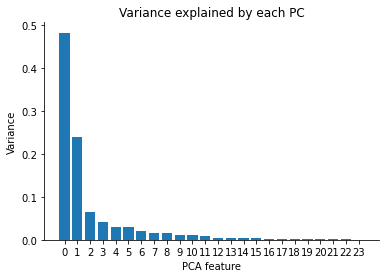

<function matplotlib.pyplot.show(close=None, block=None)>

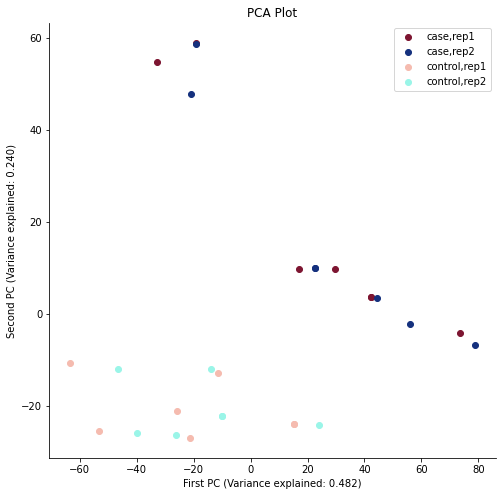

In [76]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE NON-BATCH CORRECTED DATA 
#scale the data
#samples = featuretable.values.T
#sample_names = (featuretable.columns)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_znormalised)
scaled_df_nonbc = scaler.transform(df_znormalised)

pca = PCA(n_components=24)
pca.fit(scaled_df_nonbc)
scaled_df_nonbc

#run PCA 
x_pca = pca.transform(scaled_df_nonbc)
scaled_df_nonbc.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.482)")
plt.ylabel("Second PC (Variance explained: 0.240)")

xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

# cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
# non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
# label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# # batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# # batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)
# #cancer_rep1 = plt.scatter(xs[])

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show


## Obtain binary values for non-batch corrected data

In [192]:
###apply function to the non-batch corrected data and store values as binary 
from scipy import stats
nonbc_classbinary = np.zeros(24)
nonbc_batchbinary = np.zeros(24)

#for class effect 
for a in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_nonbc), pca.components_[a])
    res = stats.ttest_ind(posa[0:11], posa[11:23], axis = 0) 
    if res.pvalue < 0.05:
        nonbc_classbinary[a] = 1
    else: 
        nonbc_classbinary[a] = 0

#for batch effect 
for b in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_nonbc), pca.components_[b])
    res = stats.ttest_ind(posa[::2], posa[1::2], axis = 0) 
    if res.pvalue < 0.05: 
        nonbc_batchbinary[b] = 1 
    else: 
        nonbc_batchbinary[b] = 0

#convert into dataframe
np_nonbc_binary = np.vstack((nonbc_classbinary, nonbc_batchbinary)).astype(np.int32)
df_nonbc_binary = pd.DataFrame(np_nonbc_binary).T

#establish columns and indexes
df_nonbc_binary.columns = ["Class", "Batch"]
df_nonbc_binary.index = pc 

df_nonbc_binary

,Class,Batch
PC1,1,0
PC2,1,0
PC3,0,0
PC4,0,0
PC5,0,0
PC6,0,0
PC7,0,0
PC8,0,0
PC9,0,0
PC10,0,0


## Obtain binary values for non-batch corrected data (intersecting genes)

In [ ]:
###apply function to the non-batch corrected data and store values as binary 
from scipy import stats
nonbc_classbinary = np.zeros(24)
nonbc_batchbinary = np.zeros(24)

#for class effect 
for a in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_nonbc), pca.components_[a])
    res = stats.ttest_ind(posa[0:11], posa[11:23], axis = 0) 
    if res.pvalue < 0.05:
        nonbc_classbinary[a] = 1
    else: 
        nonbc_classbinary[a] = 0

#for batch effect 
for b in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_nonbc), pca.components_[b])
    res = stats.ttest_ind(posa[::2], posa[1::2], axis = 0) 
    if res.pvalue < 0.05: 
        nonbc_batchbinary[b] = 1 
    else: 
        nonbc_batchbinary[b] = 0

#convert into dataframe
np_nonbc_binary = np.vstack((nonbc_classbinary, nonbc_batchbinary)).astype(np.int32)
df_nonbc_binary = pd.DataFrame(np_nonbc_binary).T

#establish columns and indexes
df_nonbc_binary.columns = ["Class", "Batch"]
df_nonbc_binary.index = pc 

df_nonbc_binary

## PCA plot on the global batch corrected data

Proportion of Variance Explained :  [3.67182061e-01 1.67608672e-01 8.15245733e-02 6.67816205e-02
 6.20486377e-02 3.71522282e-02 3.68300725e-02 2.88227271e-02
 2.60572361e-02 2.17536433e-02 1.78122461e-02 1.60979593e-02
 1.41409893e-02 1.12262245e-02 7.48807483e-03 6.32553580e-03
 5.91579162e-03 5.25017806e-03 5.05083464e-03 4.57149964e-03
 4.01147384e-03 3.55079794e-03 2.79692337e-03 6.54808515e-33]


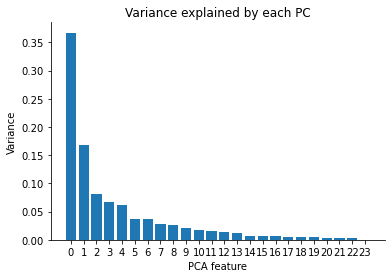

array([1.19656651e+03, 5.46200225e+02, 2.65670862e+02, 2.17626783e+02,
       2.02203021e+02, 1.21071035e+02, 1.20021200e+02, 9.39270018e+01,
       8.49148678e+01, 7.08903945e+01, 5.80462379e+01, 5.24597497e+01,
       4.60824100e+01, 3.65838252e+01, 2.44020080e+01, 2.06135460e+01,
       1.92782788e+01, 1.71091890e+01, 1.64595721e+01, 1.48975235e+01,
       1.30725212e+01, 1.15712786e+01, 9.11456524e+00, 2.13387860e-29])

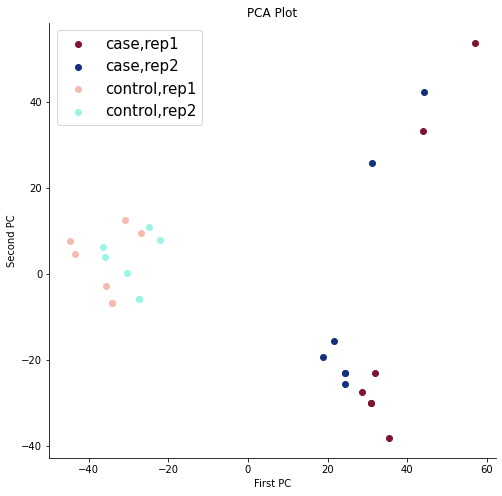

In [196]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA
#tranpose the z-normalised batch corrected data 
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA separate by batch
#tranpose the z-normalised batch corrected data 
df_z_bc_bypatients_T = df_z_bc_bypatients.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_z_bc_bypatients_T)
scaled_df_bc_znormalised = scaler.transform(df_z_bc_bypatients_T)

pca = PCA(n_components=24)
pca.fit(scaled_df_bc_znormalised)
scaled_df_bc_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_bc_znormalised)
scaled_df_bc_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC")
plt.ylabel("Second PC")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

## Obtain binary values for global batch corrected data 

In [195]:
###apply function to the non-batch corrected data and store values as binary 
from scipy import stats
globalbc_classbinary = np.zeros(24)
globalbc_batchbinary = np.zeros(24)

#for class effect 
for a in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_bc_znormalised), pca.components_[a])
    res = stats.ttest_ind(posa[0:11], posa[11:23], axis = 0) 
    if res.pvalue < 0.05:
        globalbc_classbinary[a] = 1
    else: 
        globalbc_classbinary[a] = 0

#for batch effect 
for b in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_bc_znormalised), pca.components_[b])
    res = stats.ttest_ind(posa[::2], posa[1::2], axis = 0) 
    if res.pvalue < 0.05: 
        globalbc_batchbinary[b] = 1 
    else: 
        globalbc_batchbinary[b] = 0

#convert into dataframe
np_globalbc_binary = np.vstack((globalbc_classbinary, globalbc_batchbinary)).astype(np.int32)
df_globalbc_binary = pd.DataFrame(np_globalbc_binary).T

#establish columns and indexes
df_globalbc_binary.columns = ["Class", "Batch"]
df_globalbc_binary.index = pc 

df_globalbc_binary

,Class,Batch
PC1,1,0
PC2,0,0
PC3,0,0
PC4,0,0
PC5,0,0
PC6,0,0
PC7,0,0
PC8,0,0
PC9,0,1
PC10,0,1


## PCA plot on the class specific batch corrected data

In [197]:
#this block aims to separate the data by cases, in order to hide the class effects before performing quantile normalisation 
df_cancer = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
df_control = df.iloc[:, [13,14,15,16,17,18,19,20,21,22,23,24]]

#perform class specific batch correction 
from combat.pycombat import pycombat

#transform data into suitable format for batch correction and log transform
df_cancer = df_cancer.set_index("Unnamed: 0")
df_cancer_lc = np.log2(df_cancer)
#df_control = df_control.set_index("Unnamed: 0")
df_control_lc = np.log2(df_control) 

#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2]
df_cancer_bc = pycombat(df_cancer_lc,batch)
df_control_bc = pycombat(df_control_lc,batch)
df_control_bc = df_control_bc.set_index(df_cancer_bc.index)

#merge the two class specific batch correction 
df_merge = pd.concat([df_cancer_bc, df_control_bc], axis = 1)
df_merge

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


,cancer_cc_patient1_rep1,cancer_cc_patient1_rep2,cancer_cc_patient2_rep1,cancer_cc_patient2_rep2,cancer_cc_patient3_rep1,cancer_cc_patient3_rep2,cancer_cc_patient6_rep1,cancer_cc_patient6_rep2,cancer_cc_patient7_rep1,cancer_cc_patient7_rep2,...,normal_cc_patient2_rep1,normal_cc_patient2_rep2,normal_cc_patient3_rep1,normal_cc_patient3_rep2,normal_cc_patient6_rep1,normal_cc_patient6_rep2,normal_cc_patient7_rep1,normal_cc_patient7_rep2,normal_cc_patient8_rep1,normal_cc_patient8_rep2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Q9UBE0,15.220229,15.530531,15.344171,15.606667,14.533316,14.812533,14.996347,15.021006,15.102653,14.844652,...,15.098870,14.969096,14.631736,14.839756,14.393027,14.324361,14.671554,14.400496,14.701684,14.488799
Q9BSJ8,15.024828,15.616666,16.653280,17.182701,14.803588,15.205177,15.422789,15.325625,15.694634,15.728148,...,16.092446,16.095886,15.448867,15.861459,15.516566,15.359067,15.819404,15.531918,15.195841,15.395601
P02656,18.014359,18.173844,16.913678,17.392095,17.127152,17.097648,17.440481,17.474330,17.287040,17.191751,...,16.502273,17.200232,18.067615,18.102970,17.354912,17.223812,16.991015,17.000951,17.391903,17.328958
O95741,12.124992,12.523417,12.891642,13.009279,12.469701,12.023312,11.802239,11.972835,12.404926,12.138025,...,12.180221,13.048371,13.703657,14.031494,12.591010,12.733631,13.553933,13.357162,12.284492,12.674422
P09651,16.495669,16.968211,17.224395,17.445073,16.465993,16.503832,16.713086,16.516290,16.351493,16.315904,...,16.762736,16.784511,16.547937,16.808026,16.449097,16.251615,16.691451,16.154912,15.987320,16.068521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P13010,17.586637,17.868780,18.457040,18.731905,17.961717,18.027938,18.267882,18.128923,18.020700,17.939277,...,17.786272,17.963750,17.614359,17.947681,17.783909,17.501103,18.168248,17.767633,18.129695,17.772167
O95182,15.856153,16.276552,16.609029,16.747339,16.096355,15.901750,15.974842,15.975079,16.479777,15.802059,...,17.509027,17.623749,17.580391,17.786374,17.251668,17.175588,17.255710,17.115774,17.755857,17.353628
P62241,15.931227,16.624132,17.433840,17.640753,16.043187,16.058796,16.445916,16.523266,16.071660,16.245587,...,16.679040,16.714256,15.812591,16.127525,16.325025,15.905104,16.453108,16.063876,15.741372,15.720909


In [198]:
#main aim of this block is to perform z-normalisation through patients: correct way
#apply z-normalisation on transposed featuretable 
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

#z normalise the non-batch corrected data
class_specific_merge = z_score(df_merge.T)

Proportion of Variance Explained :  [3.38655708e-01 2.40652476e-01 8.79597202e-02 5.10362527e-02
 4.87180117e-02 4.40598278e-02 3.14857923e-02 3.00765776e-02
 2.48077714e-02 2.13845364e-02 1.74000904e-02 1.47345171e-02
 1.03657136e-02 7.49176044e-03 4.96687069e-03 4.53493289e-03
 4.05960362e-03 3.63551129e-03 3.50682765e-03 3.16408680e-03
 2.90223162e-03 2.47937272e-03 1.92180735e-03 1.08011839e-32]


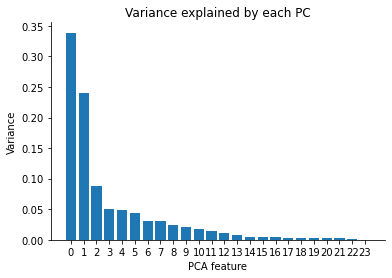

array([1.10360533e+03, 7.84234102e+02, 2.86641606e+02, 1.66316053e+02,
       1.58761409e+02, 1.43581400e+02, 1.02605352e+02, 9.80130280e+01,
       8.08431339e+01, 6.96875554e+01, 5.67031119e+01, 4.80165882e+01,
       3.37796072e+01, 2.44140186e+01, 1.61859518e+01, 1.47783604e+01,
       1.32293657e+01, 1.18473410e+01, 1.14279890e+01, 1.03110710e+01,
       9.45774192e+00, 8.07973669e+00, 6.26275238e+00, 3.51987102e-29])

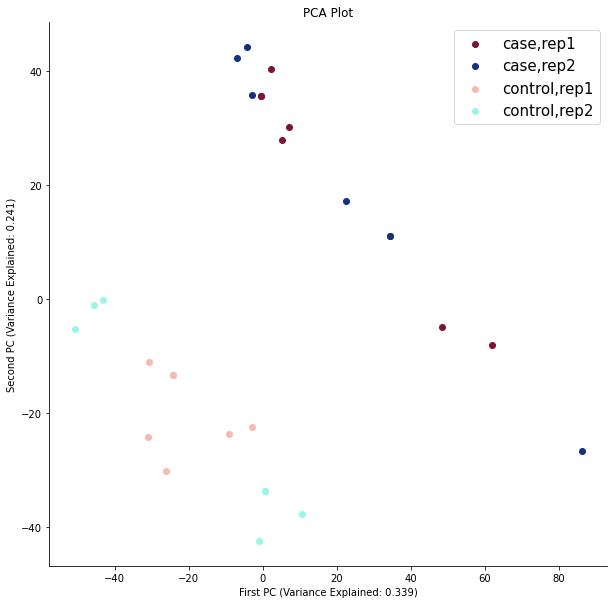

In [200]:
## This block performs the PCA on the class specific batch corrected data 
#tranpose the z-normalised class specfic batch corrected data 
df_z_cs_bc = class_specific_merge
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_z_cs_bc)
scaled_df_cs_bc = scaler.transform(df_z_cs_bc)

pca = PCA(n_components=24)
pca.fit(scaled_df_cs_bc)
scaled_df_cs_bc

#run PCA 
x_pca = pca.transform(scaled_df_cs_bc)
scaled_df_bc_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(10,10))
plt.xlabel("First PC (Variance Explained: 0.339)")
plt.ylabel("Second PC (Variance Explained: 0.241)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

## Obtain binary values for class specific batch corrected data 

In [202]:
###apply function to the non-batch corrected data and store values as binary 
from scipy import stats
csbc_classbinary = np.zeros(24)
csbc_batchbinary = np.zeros(24)

#for class effect 
for a in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_cs_bc), pca.components_[a])
    res = stats.ttest_ind(posa[0:11], posa[11:23], axis = 0) 
    if res.pvalue < 0.05:
        csbc_classbinary[a] = 1
    else: 
        csbc_classbinary[a] = 0

#for batch effect 
for b in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_cs_bc), pca.components_[b])
    res = stats.ttest_ind(posa[::2], posa[1::2], axis = 0) 
    if res.pvalue < 0.05: 
        csbc_batchbinary[b] = 1 
    else: 
        csbc_batchbinary[b] = 0

#convert into dataframe
np_csbc_binary = np.vstack((csbc_classbinary, csbc_batchbinary)).astype(np.int32)
df_csbc_binary = pd.DataFrame(np_csbc_binary).T

#establish columns and indexes
df_csbc_binary.columns = ["Class", "Batch"]
df_csbc_binary.index = pc 

df_csbc_binary

,Class,Batch
PC1,1,0
PC2,1,0
PC3,0,0
PC4,0,0
PC5,0,0
PC6,0,0
PC7,0,0
PC8,0,0
PC9,0,0
PC10,0,0


## PCA plot on the CS Quantile + CS Batch Corrected Data 

In [203]:
#this block aims to separate the data by cases, in order to hide the class effects before performing quantile normalisation 
df_cancer = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
df_control = df.iloc[:, [13,14,15,16,17,18,19,20,21,22,23,24]]
df_control = df_control.set_index(df_cancer.index)
df_cancer = df_cancer.set_index("Unnamed: 0")

#Order values in each sample 
df_cancer_sorted = pd.DataFrame(np.sort(df_cancer.values, axis = 0), index = df_cancer.index, columns = df_cancer.columns)
df_control_sorted = pd.DataFrame(np.sort(df_control.values, axis = 0), index = df_control.index, columns = df_control.columns)

#Calculate the mean for each row 
df_cancer_mean = df_cancer_sorted.mean(axis = 1)
df_cancer_mean.index = np.arange(1, len(df_cancer_mean)+1)
df_control_mean = df_control_sorted.mean(axis = 1)
df_control_mean.index = np.arange(1, len(df_control_mean)+1)

#Obtain the rank of original data 
df_cancer_rank = df_cancer.rank(method="min").astype(int)
df_control_rank = df_control.rank(method="min").astype(int)

#Quantile normalise the data 
df_cancer_qn = df_cancer.rank(method = "min").stack().astype(int).map(df_cancer_mean).unstack()
df_control_qn = df_control.rank(method = "min").stack().astype(int).map(df_control_mean).unstack()

In [204]:
#box plots after normalisation 
#perform class specific batch correction 
from combat.pycombat import pycombat

#transform data into suitable format for batch correction and log transform
df_cancer_qn_lc = np.log2(df_cancer_qn)
#df_control = df_control.set_index("Unnamed: 0")
df_control_qn_lc = np.log2(df_control_qn) 

#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2]
df_cancer_qn_bc = pycombat(df_cancer_qn_lc,batch)
df_control_qn_bc = pycombat(df_control_qn_lc,batch)
df_control_qn_bc = df_control_bc.set_index(df_cancer_bc.index)

#merge the two class specific batch correction 
df_qn_merge = pd.concat([df_cancer_qn_bc, df_control_qn_bc], axis = 1)
df_qn_merge

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


,cancer_cc_patient1_rep1,cancer_cc_patient1_rep2,cancer_cc_patient2_rep1,cancer_cc_patient2_rep2,cancer_cc_patient3_rep1,cancer_cc_patient3_rep2,cancer_cc_patient6_rep1,cancer_cc_patient6_rep2,cancer_cc_patient7_rep1,cancer_cc_patient7_rep2,...,normal_cc_patient2_rep1,normal_cc_patient2_rep2,normal_cc_patient3_rep1,normal_cc_patient3_rep2,normal_cc_patient6_rep1,normal_cc_patient6_rep2,normal_cc_patient7_rep1,normal_cc_patient7_rep2,normal_cc_patient8_rep1,normal_cc_patient8_rep2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Q9UBE0,15.334563,15.402300,15.108677,15.094248,14.815635,15.116204,15.092305,15.278692,15.187030,15.149084,...,15.098870,14.969096,14.631736,14.839756,14.393027,14.324361,14.671554,14.400496,14.701684,14.488799
Q9BSJ8,15.348175,15.296213,16.523151,16.715812,15.173593,15.335786,15.652587,15.423331,15.892125,15.891390,...,16.092446,16.095886,15.448867,15.861459,15.516566,15.359067,15.819404,15.531918,15.195841,15.395601
P02656,18.054654,18.027199,16.836522,16.883938,17.294806,17.256008,17.456716,17.593953,17.395315,17.404799,...,16.502273,17.200232,18.067615,18.102970,17.354912,17.223812,16.991015,17.000951,17.391903,17.328958
O95741,12.344448,12.358265,12.542757,12.358265,12.630105,12.393744,12.042943,12.358265,12.433242,12.649732,...,12.180221,13.048371,13.703657,14.031494,12.591010,12.733631,13.553933,13.357162,12.284492,12.674422
P09651,16.708700,16.830907,17.041994,17.015420,16.640518,16.730551,16.785005,16.642944,16.487905,16.540893,...,16.762736,16.784511,16.547937,16.808026,16.449097,16.251615,16.691451,16.154912,15.987320,16.068521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P13010,17.777606,17.698098,18.370806,18.402607,18.055633,18.191508,18.276606,18.255535,18.088573,18.145069,...,17.786272,17.963750,17.614359,17.947681,17.783909,17.501103,18.168248,17.767633,18.129695,17.772167
O95182,16.050953,16.128783,16.408508,16.298095,16.223905,16.136442,16.086730,16.166535,16.514432,16.045759,...,17.509027,17.623749,17.580391,17.786374,17.251668,17.175588,17.255710,17.115774,17.755857,17.353628
P62241,16.267406,16.389039,17.359901,17.154750,16.298652,16.165052,16.620164,16.594174,16.291197,16.383884,...,16.679040,16.714256,15.812591,16.127525,16.325025,15.905104,16.453108,16.063876,15.741372,15.720909


Proportion of Variance Explained :  [3.44336620e-01 1.42630778e-01 1.28484837e-01 6.65849862e-02
 5.51222092e-02 4.93367148e-02 3.61251860e-02 3.15015500e-02
 2.64569185e-02 2.41582353e-02 2.01717561e-02 1.73220040e-02
 1.15453117e-02 8.35589287e-03 7.16617516e-03 5.28685554e-03
 4.67923168e-03 4.34386133e-03 3.87078843e-03 3.63882656e-03
 3.55105232e-03 2.94726637e-03 2.38294296e-03 6.09499881e-33]


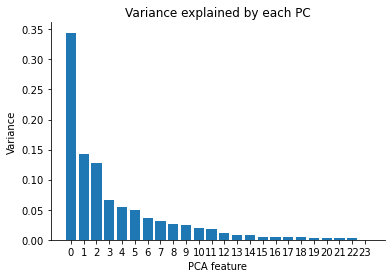

array([1.12211819e+03, 4.64802698e+02, 4.18704153e+02, 2.16985995e+02,
       1.79631297e+02, 1.60777628e+02, 1.17724128e+02, 1.02656703e+02,
       8.62173459e+01, 7.87264371e+01, 6.57353681e+01, 5.64486453e+01,
       3.76236611e+01, 2.72300384e+01, 2.33530070e+01, 1.72287129e+01,
       1.52485988e+01, 1.41556997e+01, 1.26140580e+01, 1.18581447e+01,
       1.15721076e+01, 9.60450040e+00, 7.76549307e+00, 1.98622761e-29])

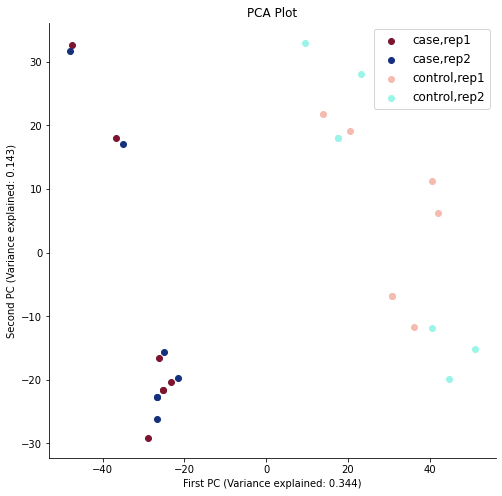

In [208]:
## This block performs the PCA on the class specific batch corrected data 
#tranpose the z-normalised class specfic batch corrected data 
df_qn_cs_bc = df_qn_merge.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_qn_cs_bc)
scaled_df_qn_cs_bc = scaler.transform(df_qn_cs_bc)

pca = PCA(n_components=24)
pca.fit(scaled_df_qn_cs_bc)
scaled_df_qn_cs_bc

#run PCA 
x_pca = pca.transform(scaled_df_qn_cs_bc)
scaled_df_qn_cs_bc.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.344)")
plt.ylabel("Second PC (Variance explained: 0.143)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 12})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

## Obtain the binary values for the CS quantile normalised + CS batch corrected data 

In [209]:
###apply function to the non-batch corrected data and store values as binary 
from scipy import stats
csqn_csbc_classbinary = np.zeros(24)
csqn_csbc_batchbinary = np.zeros(24)

#for class effect 
for a in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_qn_cs_bc), pca.components_[a])
    res = stats.ttest_ind(posa[0:11], posa[11:23], axis = 0) 
    if res.pvalue < 0.05:
        csqn_csbc_classbinary[a] = 1
    else: 
        csqn_csbc_classbinary[a] = 0

#for batch effect 
for b in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_cs_bc), pca.components_[b])
    res = stats.ttest_ind(posa[::2], posa[1::2], axis = 0) 
    if res.pvalue < 0.05: 
        csqn_csbc_batchbinary[b] = 1 
    else: 
        csqn_csbc_batchbinary[b] = 0

#convert into dataframe
np_csqn_csbc_binary = np.vstack((csqn_csbc_classbinary, csqn_csbc_batchbinary)).astype(np.int32)
df_csqn_csbc_binary = pd.DataFrame(np_csqn_csbc_binary).T

#establish columns and indexes
df_csqn_csbc_binary.columns = ["Class", "Batch"]
df_csqn_csbc_binary.index = pc 

df_csqn_csbc_binary

,Class,Batch
PC1,1,0
PC2,0,0
PC3,0,0
PC4,0,0
PC5,0,0
PC6,0,0
PC7,0,0
PC8,0,0
PC9,0,0
PC10,0,0


## Plot PCA for CS Quantile Normalised Data + No Batch Correction 

In [211]:
#df_control_qn_lc.set_index(genes)
genes = featuretable.columns.tolist()
df_control_qn_lc.index = genes
df_control_qn_lc
df_qn_merge_nobc = pd.concat([df_cancer_qn_lc, df_control_qn_lc], axis = 1)
df_qn_merge_nobc

,cancer_cc_patient1_rep1,cancer_cc_patient1_rep2,cancer_cc_patient2_rep1,cancer_cc_patient2_rep2,cancer_cc_patient3_rep1,cancer_cc_patient3_rep2,cancer_cc_patient6_rep1,cancer_cc_patient6_rep2,cancer_cc_patient7_rep1,cancer_cc_patient7_rep2,...,normal_cc_patient2_rep1,normal_cc_patient2_rep2,normal_cc_patient3_rep1,normal_cc_patient3_rep2,normal_cc_patient6_rep1,normal_cc_patient6_rep2,normal_cc_patient7_rep1,normal_cc_patient7_rep2,normal_cc_patient8_rep1,normal_cc_patient8_rep2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Q9UBE0,15.332235,15.404099,15.099978,15.103715,14.798670,15.125124,15.083143,15.283568,15.180541,15.157186,...,14.903270,14.711183,14.680282,14.594835,14.486280,14.632214,14.637993,14.722043,14.745801,14.813552
Q9BSJ8,15.347993,15.295981,16.513809,16.726582,15.174773,15.335861,15.650033,15.424084,15.887703,15.895771,...,15.898597,15.867436,15.550504,15.638191,15.565144,15.658132,15.741298,15.846478,15.369907,15.646669
P02656,18.049603,18.032346,16.830558,16.889838,17.289185,17.261663,17.451216,17.599385,17.389770,17.410355,...,16.706046,16.791017,18.017962,17.941031,17.443117,17.453585,17.136709,17.170870,17.501158,17.494620
O95741,12.322914,12.379739,12.527823,12.379739,12.618080,12.414663,12.011373,12.379739,12.414663,12.666649,...,12.438554,12.481064,13.751570,13.778548,12.761240,12.987456,13.525990,13.694594,12.631253,12.949340
P09651,16.705352,16.832371,17.043884,17.013944,16.636099,16.733615,16.782856,16.647403,16.481087,16.546979,...,16.662275,16.507174,16.635894,16.588618,16.514634,16.491609,16.625217,16.380016,16.307840,16.251504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P13010,17.775634,17.699627,18.366319,18.407226,18.052482,18.195201,18.272519,18.259509,18.085283,18.148558,...,17.806971,17.782105,17.724122,17.720785,17.794386,17.711073,18.089299,18.079618,18.072402,18.026810
O95182,16.055011,16.117581,16.429241,16.281437,16.236028,16.124993,16.092456,16.154116,16.540104,16.037232,...,17.464043,17.438280,17.544475,17.622030,17.315139,17.457029,17.315139,17.393728,17.654512,17.595513
P62241,16.265261,16.390254,17.365246,17.150748,16.296721,16.167794,16.620437,16.593992,16.289214,16.385135,...,16.523009,16.502802,15.965523,15.813804,16.329884,16.178999,16.393580,16.347722,15.941718,15.939994


Proportion of Variance Explained :  [3.70354569e-01 1.62993845e-01 8.28561324e-02 6.64161793e-02
 6.05567108e-02 3.72489079e-02 3.65421129e-02 2.94690171e-02
 2.72804361e-02 2.25275928e-02 1.87934192e-02 1.61849402e-02
 1.17966670e-02 8.84747713e-03 8.14202090e-03 6.71304620e-03
 6.02437130e-03 5.54327121e-03 5.36080141e-03 4.78537000e-03
 4.49993392e-03 3.94240944e-03 3.12076895e-03 6.85915885e-33]


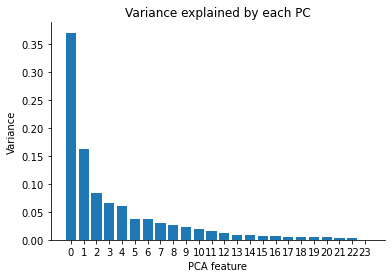

<function matplotlib.pyplot.show(close=None, block=None)>

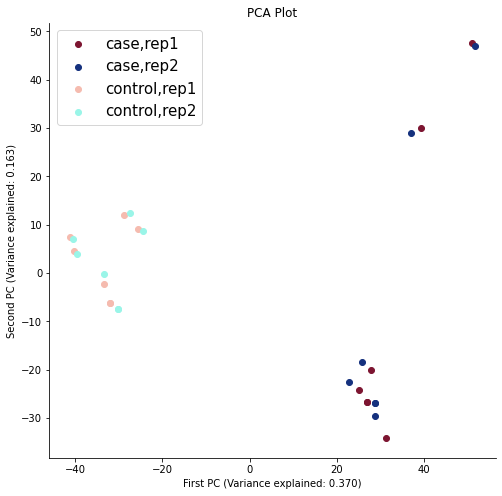

In [213]:
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_qn_merge_nobc.T)
scaled_df_qn_merge_nobc = scaler.transform(df_qn_merge_nobc.T)

pca = PCA(n_components=24)
pca.fit(scaled_df_qn_merge_nobc)
scaled_df_qn_merge_nobc 

#run PCA 
x_pca = pca.transform(scaled_df_qn_merge_nobc )
scaled_df_qn_merge_nobc.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.370)")
plt.ylabel("Second PC (Variance explained: 0.163)")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show

## Obtain the binary values for the CS quantile normalised + non batch corrected data


In [217]:
###apply function to the non-batch corrected data and store values as binary 
from scipy import stats
csqn_nobc_classbinary = np.zeros(24)
csqn_nobc_batchbinary = np.zeros(24)

#for class effect 
for a in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_qn_merge_nobc), pca.components_[a])
    res = stats.ttest_ind(posa[0:11], posa[11:23], axis = 0) 
    if res.pvalue < 0.05:
        csqn_nobc_classbinary[a] = 1
    else: 
        csqn_nobc_classbinary[a] = 0

#for batch effect 
for b in range(24):
    posa = calcpc(pd.DataFrame(scaled_df_qn_merge_nobc), pca.components_[b])
    res = stats.ttest_ind(posa[::2], posa[1::2], axis = 0) 
    if res.pvalue < 0.05: 
        csqn_nobc_batchbinary[b] = 1 
    else: 
        csqn_nobc_batchbinary[b] = 0

#convert into dataframe
np_csqn_nobc_binary = np.vstack((csqn_nobc_classbinary, csqn_nobc_batchbinary)).astype(np.int32)
df_csqn_nobc_binary = pd.DataFrame(np_csqn_csbc_binary).T

#establish columns and indexes
df_csqn_nobc_binary.columns = ["Class", "Batch"]
df_csqn_nobc_binary.index = pc 

df_csqn_nobc_binary

,Class,Batch
PC1,1,0
PC2,0,0
PC3,0,0
PC4,0,0
PC5,0,0
PC6,0,0
PC7,0,0
PC8,0,0
PC9,0,0
PC10,0,0
